#  <span style="color: DeepPink"> AMES HOUSING</span>

# <span style="color: blue">EXPLORATORY DATA ANALYSIS ON AMES HOUSING</span>

### <span style="color: blue">Problem Statement: To be able to predict houses expected price.
Using the predictors,we can predict the selling price of the houses.AMES housing  data set contains 80 features excluding the target feature SalePrice.Using Exploratory Data Analysis and Feature Engineering and 
Model benchmarking was done with reference to Ridge, Lasso modelling methods.Since there are so many features we will choose the different features to build a model that can be used. Success of the model is based upon a few features that gives the lowest error.Primary audience is the home owners who wishes to sell their homes and home buyers who will like to purchase homes.</span>

  ## <span style="color: blue">IMPORTING LIBRARY</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
 

from sklearn.preprocessing import  StandardScaler,PolynomialFeatures
from sklearn.impute import SimpleImputer

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet


from sklearn.metrics import mean_squared_error


%matplotlib inline

 ## <span style="color: blue">IMPORTING TRAIN DATASET</span>

In [2]:
df = pd.read_csv('train.csv')
df.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [3]:
test = pd.read_csv('test.csv')
test.head(2)

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   

  Alley Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area Pool QC  \
0  Grvl       Reg          Lvl  ...          0            0         0     NaN   
1   NaN       IR1          Lvl  ...          0            0         0     NaN   

  Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  
0   NaN          NaN        0       4     2006        WD   
1   NaN          NaN        0       8     2006        WD   

[2 rows x 80 columns]


### <span style="color: blue">DATA CLEANING AND CHECKING FOR NULL VALUES IN TRAIN DATASET</span>


### <span style="color: blue"> There are many null values for both train and test datasets. </span>

In [4]:
df.shape

(2051, 81)

In [5]:
test.shape

(879, 80)

In [6]:
df.dtypes

Id                  int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
                   ...   
Half Bath           int64
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace Qu


### <span style="color: blue"> Some of these have a high percentage of nulls (such as ‘Pool Qc’ with 99.5% of values being nulls) and others have a low percentage. </span> 
 
 

In [7]:
def missing(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    
    return missing_data.head(20)

missing(df)

Total   Percent
Pool QC          2042  0.995612
Misc Feature     1986  0.968308
Alley            1911  0.931741
Fence            1651  0.804973
Fireplace Qu     1000  0.487567
Lot Frontage      330  0.160897
Garage Finish     114  0.055583
Garage Cond       114  0.055583
Garage Qual       114  0.055583
Garage Yr Blt     114  0.055583
Garage Type       113  0.055095
Bsmt Exposure      58  0.028279
BsmtFin Type 2     56  0.027304
BsmtFin Type 1     55  0.026816
Bsmt Cond          55  0.026816
Bsmt Qual          55  0.026816
Mas Vnr Type       22  0.010726
Mas Vnr Area       22  0.010726
Bsmt Half Bath      2  0.000975
Bsmt Full Bath      2  0.000975


### <span style="color: blue">SPLIT TRAIN DATASET TO  CATEGORICAL AND NUMERIC DATA</span>

In [8]:
df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [9]:
#### Separate into nominal features and temp features
#### 'Year Built','Year Remod/Add','Garage Yr Blt','Yr Sold' are the year sold will be analysing in the later part 

In [10]:
nominal_features = ['Alley','Lot Shape','Land Contour',
                   'Overall Cond','Roof Style','Roof Matl','Exterior 1st',
                   'Exterior 2nd', 'Mas Vnr Type','Exter Qual',
                   'Exter Cond','Utilities','Lot Config','Land Slope',
                   'Neighborhood','Condition 1','Condition 2',
                   'Bldg Type','House Style','Overall Qual','Foundation','Bsmt Qual','Bsmt Cond',
                   'Bsmt Exposure','MS SubClass','MS Zoning','Street','BsmtFin Type 1','BsmtFin Type 2',
                   'Heating','Heating QC','Central Air','Electrical',
                   'Bsmt Full Bath','Bsmt Half Bath','Full Bath',
                   'Half Bath','Bedroom AbvGr','Kitchen AbvGr','Kitchen Qual',
                   'TotRms AbvGrd','Functional','Fireplaces',
                   'Fireplace Qu','Garage Type',
                   'Garage Finish','Garage Cars','Garage Qual',
                   'Garage Cond','Paved Drive','Pool QC','Fence',
                   'Misc Feature','Mo Sold',
                   'Sale Type','Year Built','Year Remod/Add','Garage Yr Blt','Yr Sold']

temp_features = ['Year Built','Year Remod/Add','Garage Yr Blt','Yr Sold']

non_numeric_features  = nominal_features + temp_features

# convert nominal features into category datatype
for features in nominal_features:
    df[features] = df[features].astype("category")

### <span style="color: blue"> CHECKING FOR NUMERICAL CATEGORY AND DROPPING CERTAIN COLUMNS</span>


#### <span style="color: blue"> DROP 2 COLUMNS THAT ARE PID AND ID AS THEY DOES NOT SHOW THE RELATIONSHIP WITH SALEPRICE</span>

In [11]:
numerical_columns = [col for col in df.columns if col not in non_numeric_features]
numerical_columns = [col for col in numerical_columns if col not in ['PID','Id']]

In [12]:
numerical_columns

['Lot Frontage',
 'Lot Area',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'SalePrice']

In [13]:
df[numerical_columns].dtypes

Lot Frontage       float64
Lot Area             int64
Mas Vnr Area       float64
BsmtFin SF 1       float64
BsmtFin SF 2       float64
Bsmt Unf SF        float64
Total Bsmt SF      float64
1st Flr SF           int64
2nd Flr SF           int64
Low Qual Fin SF      int64
Gr Liv Area          int64
Garage Area        float64
Wood Deck SF         int64
Open Porch SF        int64
Enclosed Porch       int64
3Ssn Porch           int64
Screen Porch         int64
Pool Area            int64
Misc Val             int64
SalePrice            int64
dtype: object

## <span style="color: blue"> Neighbourhoods relationship with Saleprice. As seen from the bar plot , StoneBr, NridgeHt, NoRidge and Grnhill are neighbourhoods with higher SalePrice.BrDale,IDOTRR, Meadowv are the neighbourhoods with least median prices.
</span>

Text(0.5, 1.0, 'Neighborhood Mean Price')

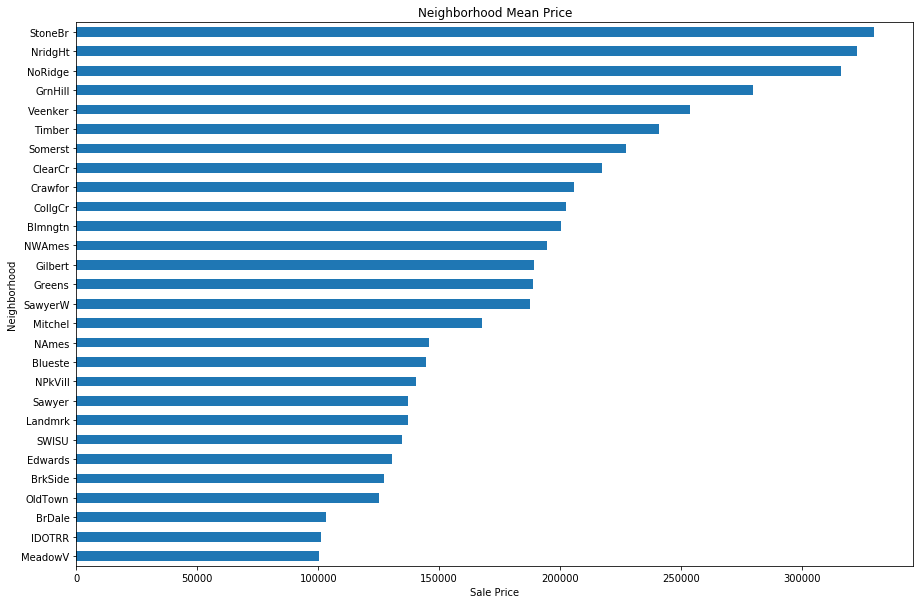

In [14]:
plt.figure(figsize=(15,10))
ax = df.groupby('Neighborhood').SalePrice.mean().sort_values(ascending=True).plot(kind='barh')
ax.set_xlabel('Sale Price')
ax.set_ylabel('Neighborhood')
ax.set_title('Neighborhood Mean Price')

## <span style="color: blue"> SHOWING THE BOXPLOT OF ALL THE NOMINAL FEATURES IN RELATIONSHIP WITH SALEPRICE. THERE ARE SOME OUTLIERS THAT CAN ALSO BE SEEN IN THE BOXPLOT
</span>

In [15]:
def subplot_boxplot(dataframe, list_of_columns,reference='SalePrice'):
    nrows = int(np.ceil(len(list_of_columns)/2))  
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize = (15,100)) 

    ax = ax.ravel()
    for i, column in enumerate(list_of_columns): 
        sns.boxplot(x=dataframe[column],y=dataframe[reference],ax=ax[i])

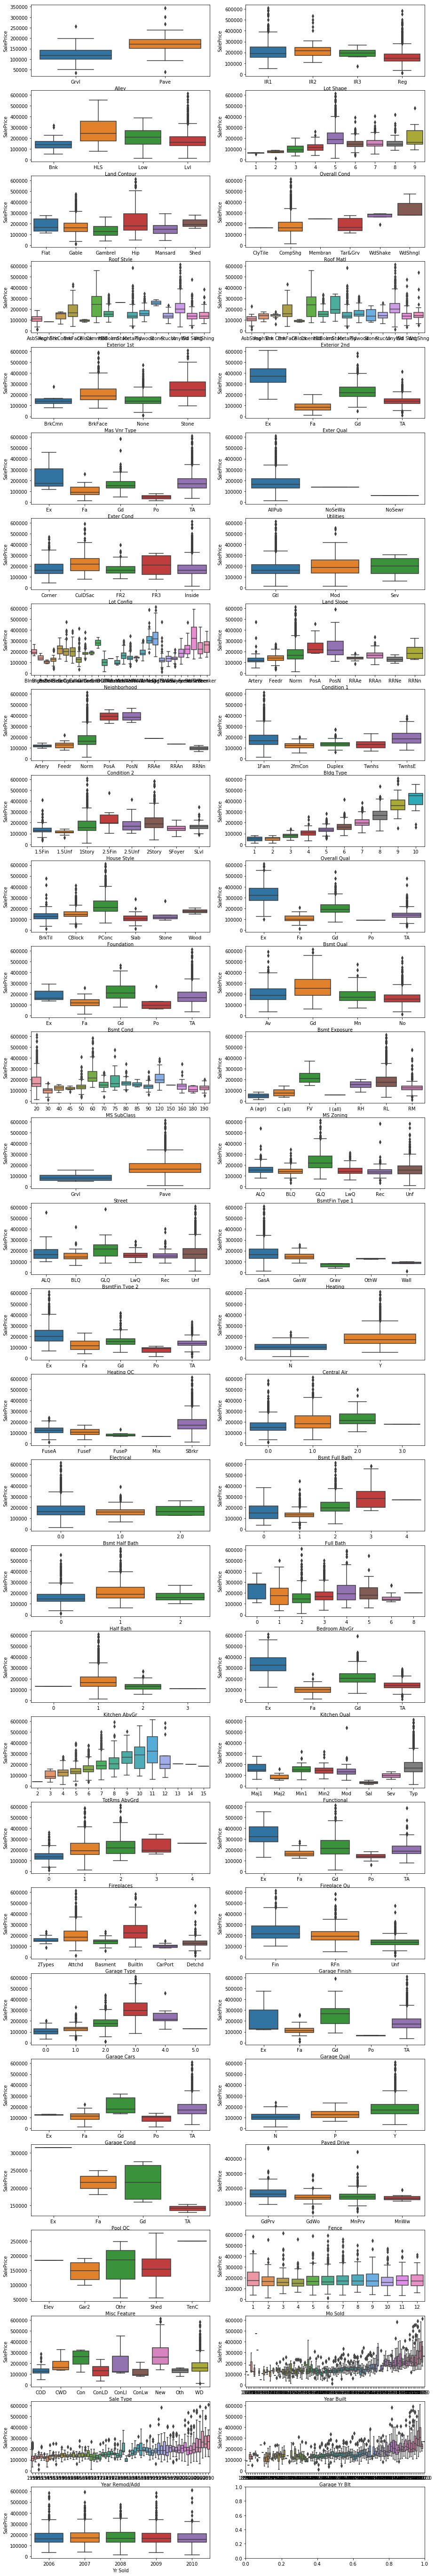

In [16]:
subplot_boxplot(df,nominal_features)

## <span style="color: blue"> As seen from the countplot, SalePrice has increased steadily with Year Built</span>

In [17]:
df['Year Built'].astype='int'

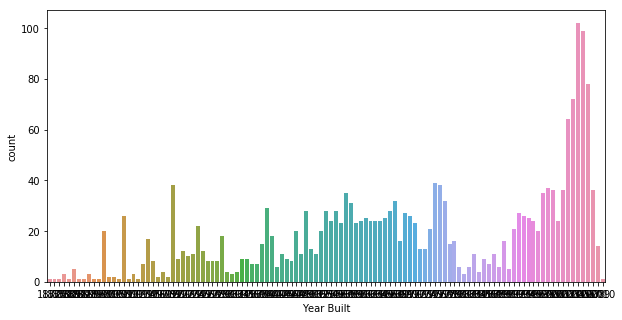

In [18]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df['Year Built'])

In [19]:
def subplot_boxplot(dataframe, list_of_columns,reference='SalePrice'):
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize = (15,100)) 
    

    ax = ax.ravel()  
    for i, column in enumerate(list_of_columns):  
        sns.boxplot(x=dataframe[column],y=dataframe[reference],ax=ax[i])

In [20]:
def subplot_countplot(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize = (15,100))  

    ax = ax.ravel()  
    for i, column in enumerate(list_of_columns):  
        sns.countplot(x=dataframe[column],ax=ax[i])

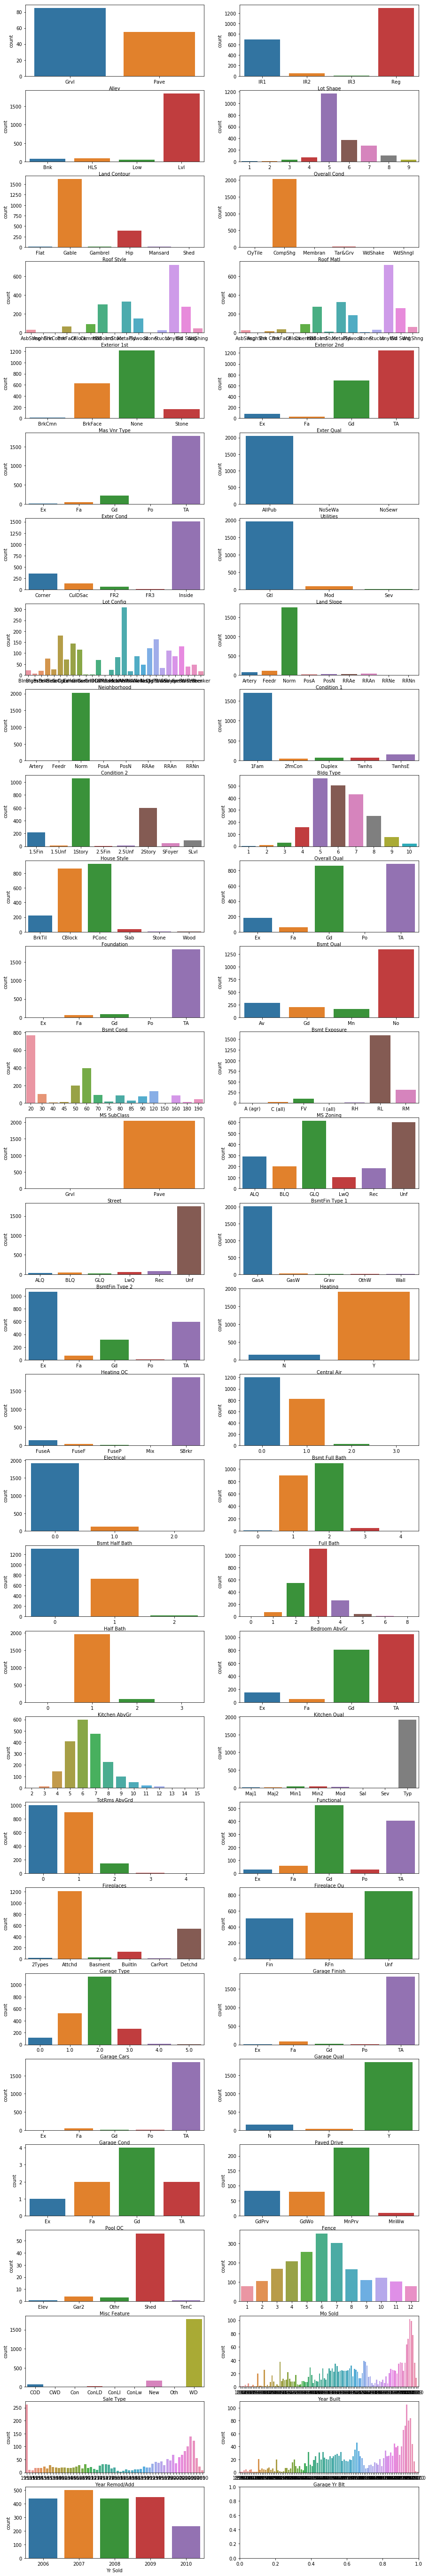

In [21]:
subplot_countplot(df,nominal_features)

### <span style="color: blue"> Since garage has many columns such as Garage yr built, Garage Finish, Garage cars, Garage Area, Garage Qual, Garage condition, there is a need to drop columns that has been used for transformation.</span>

In [22]:
df.filter(regex='Year|Yr').describe()

Year Built  Year Remod/Add  Garage Yr Blt  Yr Sold
count         2051            2051         1937.0     2051
unique         113              61          100.0        5
top           2005            1950         2005.0     2007
freq           102             262          105.0      498

In [23]:
df.filter(regex='Year|Yr|Garage').isna().sum()

Year Built          0
Year Remod/Add      0
Garage Type       113
Garage Yr Blt     114
Garage Finish     114
Garage Cars         1
Garage Area         1
Garage Qual       114
Garage Cond       114
Yr Sold             0
dtype: int64

In [24]:
df['Year Built'].dtypes

CategoricalDtype(categories=[1872, 1875, 1879, 1880, 1885, 1890, 1892, 1893, 1895, 1896,
                  ...
                  2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010],
                 ordered=False)

In [25]:
df['Year Remod/Add'].dtypes

CategoricalDtype(categories=[1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
                  1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
                  1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
                  1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
                  1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
                  2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
                  2010],
                 ordered=False)

In [26]:
df['garage_age'] = df.apply(lambda x: (x['Yr Sold'] - x['Year Remod/Add']) if type(x['Garage Yr Blt']) == 'nan' else (x['Yr Sold'] - x['Garage Yr Blt']) , axis=1)

In [27]:
df.garage_age.sort_values(ascending=True).head()

1699   -200.0
1885     -1.0
1424      0.0
1758      0.0
867       0.0
Name: garage_age, dtype: float64

In [28]:
df.drop(columns=['Year Built','Year Remod/Add','Garage Yr Blt'])

Id        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      109  533352170          60        RL           NaN     13517   Pave   
1      544  531379050          60        RL          43.0     11492   Pave   
2      153  535304180          20        RL          68.0      7922   Pave   
3      318  916386060          60        RL          73.0      9802   Pave   
4      255  906425045          50        RL          82.0     14235   Pave   
5      138  535126040          20        RL         137.0     16492   Pave   
6     2827  908186070         180        RM          35.0      3675   Pave   
7      145  535154050          20        RL           NaN     12160   Pave   
8     1942  535353130          20        RL           NaN     15783   Pave   
9     1956  535426130          60        RL          70.0     11606   Pave   
10    1044  527451290         160        RM          21.0      1680   Pave   
11    2752  906380150          20        RL          64.0      7488   Pave   
12     807  906226060          70        RL         120.0     26400   Pave   
13    1177  533236070         160        FV          24.0      2645   Pave   
14    1480  907418040          20        RL          74.0      9627   Pave   
15     324  923202105          20        RL          93.0     10114   Pave   
16    1311  902301140          70        RM          34.0      4571   Pave   
17     770  905101490          20        RL          80.0      8816   Pave   
18    2063  905107140          20        RL          71.0      8197   Pave   
19      69  528458070          60        FV          72.0      8640   Pave   
20    2062  905106150          20        RL         109.0      8724   Pave   
21     351  527131030         120        RL          40.0      5664   Pave   
22    2393  528142010          60        RL         103.0     12867   Pave   
23      12  527165230          20        RL           NaN      7980   Pave   
24    2339  527250040         190        RL         100.0     34650   Pave   
25     624  535104120          20        RL          92.0     10573   Pave   
26      86  532376160          20        RL          65.0      8450   Pave   
27    1534  909277040          50        RL           NaN     11700   Pave   
28    2243  911103060         190   C (all)          75.0      8250   Pave   
29    1957  535450190          50        RL          60.0      8064   Pave   
...    ...        ...         ...       ...           ...       ...    ...   
2021  2810  907410100          60        RL          70.0      8400   Pave   
2022  2872  909475020          20        RL           NaN     16381   Pave   
2023  1072  528181010         120        RL         135.0     12304   Pave   
2024  1654  527353080          60        RL          80.0     11584   Pave   
2025  2394  528142060          60        RL          82.0     10672   Pave   
2026  2212  909275110          70        RL          60.0      7230   Pave   
2027  2628  535456010          90        RL          75.0      8512   Pave   
2028  2526  534127190          20        RL           NaN     20781   Pave   
2029   969  921128050          20        RL          85.0     12633   Pave   
2030   306  911202100          50   C (all)          66.0      8712   Pave   
2031    25  527402250          20        RL           NaN     12537   Pave   
2032   311  914475090          80        RL          74.0      9620   Pave   
2033   300  909455040         120        RM          35.0      3907   Pave   
2034  2775  907175060          20        RL          79.0      9236   Pave   
2035  2862  909279040          30        RL          80.0     11600   Pave   
2036   525  528477070          60        FV          84.0     10603   Pave   
2037  2730  905300080          20        RL         100.0     13350   Pave   
2038  1892  534401200          80        RL          80.0      9200   Pave   
2039  2288  923228220         160        RM          21.0      1495   Pave   
2040  2728  905225080         

## <span style="color: blue"> HEATMAP TO SHOW CORRELATION, PAIRPLOTS AND SCATTERPLOTS TO SHOW OUTLIERS AND REMOVE OUTLIERS.</span>

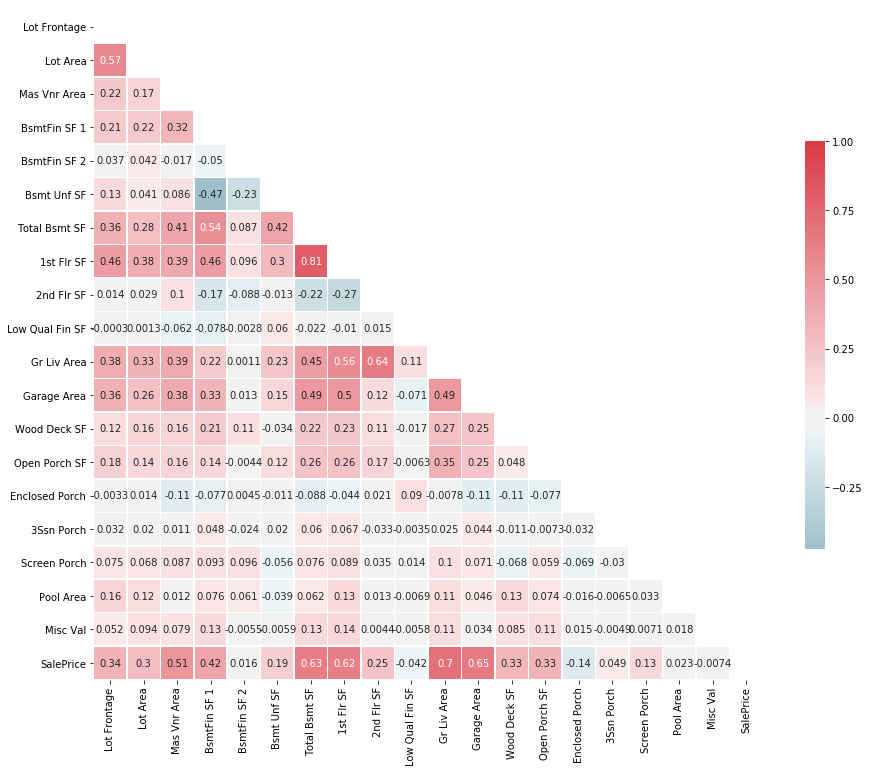

In [29]:

corr = df[numerical_columns].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

## FROM HEATMAP, GR LIV AREA IS IMPORTANT FEATURE. CERTAIN NUMERICAL CATEGORIES WITH LOW CORRELATION CAN BE DROPPED

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


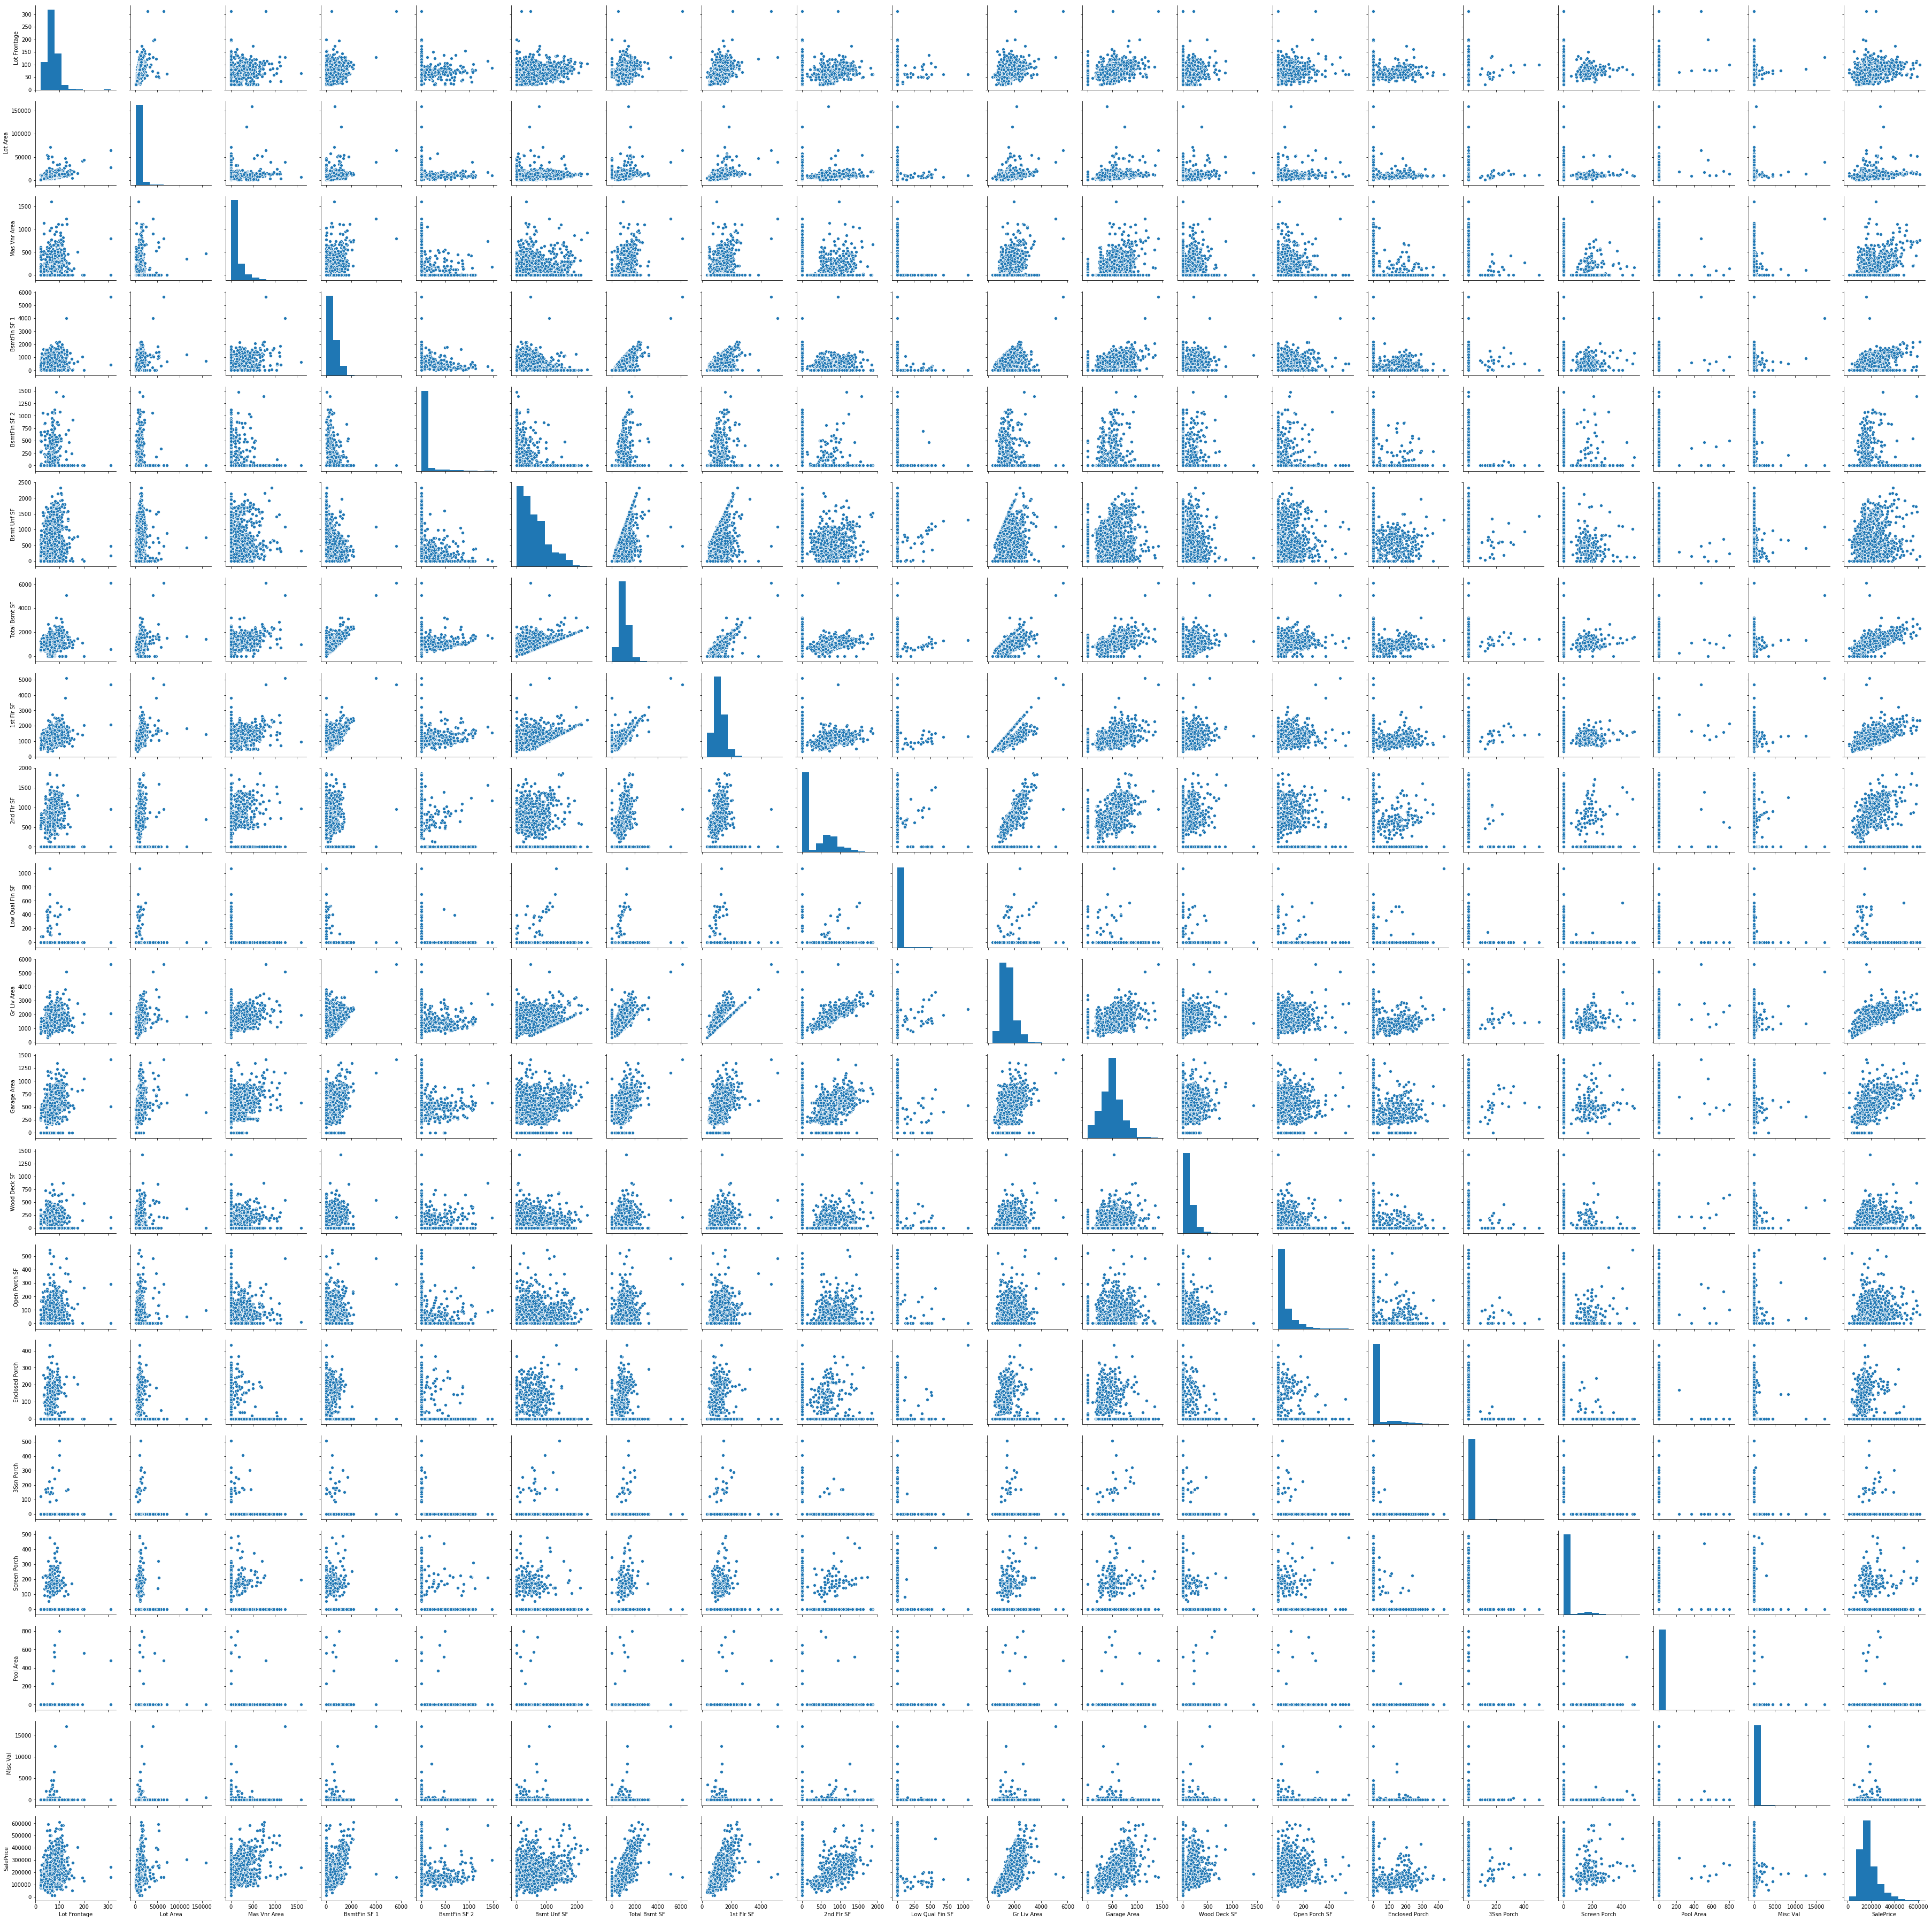

In [30]:
sns.pairplot(df[numerical_columns])



## <span style="color: blue"> There are 2 outliers that can be seen that is above 4000 sqft from Gr Liv Area</span>

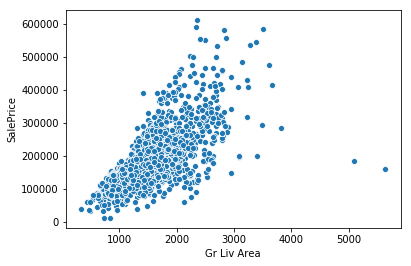

In [31]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)


In [32]:
df = df[df['Gr Liv Area'] <= 4000]


In [33]:

df[numerical_columns]=df[numerical_columns].replace(np.nan,0)

In [34]:
df[nominal_features]=df[nominal_features].replace(np.nan,'missing')

In [35]:
def subplot_scatterplot(dataframe, list_of_columns,reference='SalePrice'):
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize = (15,100)) 

    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns):
        sns.scatterplot(x=dataframe[column],y=dataframe[reference],ax=ax[i])

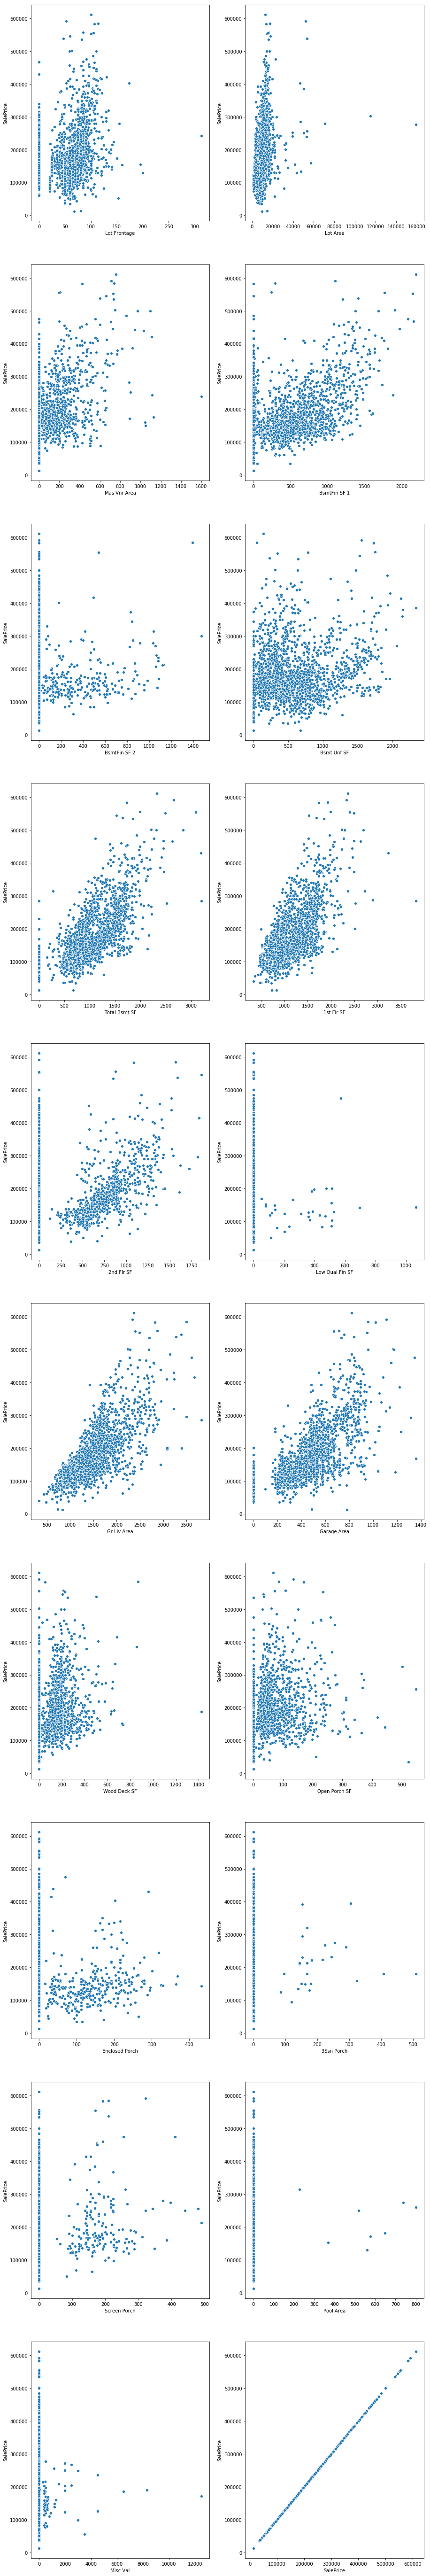

In [36]:
subplot_scatterplot(df,numerical_columns)


In [37]:
df[numerical_columns].isna().sum()

Lot Frontage       0
Lot Area           0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
SalePrice          0
dtype: int64

In [38]:
combined_features = nominal_features + numerical_columns

In [39]:

df[combined_features].to_csv('/Users/shaminimagandran/Desktop/moditrain.csv')

# <span style="color: red"> Preproceesing andFeature_Engineering</span>

In [40]:
df1 =pd.read_csv('moditrain.csv')
df1

Unnamed: 0    Alley Lot Shape Land Contour  Overall Cond Roof Style  \
0              0  missing       IR1          Lvl             8      Gable   
1              1  missing       IR1          Lvl             5      Gable   
2              2  missing       Reg          Lvl             7      Gable   
3              3  missing       Reg          Lvl             5      Gable   
4              4  missing       IR1          Lvl             8      Gable   
5              5  missing       IR1          Lvl             6      Gable   
6              6  missing       Reg          Lvl             5      Gable   
7              7  missing       IR1          Lvl             5        Hip   
8              8  missing       Reg          Lvl             5      Gable   
9              9  missing       IR1          HLS             5      Gable   
10            10  missing       Reg          Lvl             5      Gable   
11            11  missing       IR1          Lvl             5      Gable   
12            12  missing       Reg          Bnk             7      Gable   
13            13     Pave       Reg          Lvl             5      Gable   
14            14  missing       Reg          Lvl             5      Gable   
15            15  missing       Reg          Lvl             5      Gable   
16            16     Grvl       Reg          Lvl             5      Gable   
17            17  missing       Reg          Lvl             6      Gable   
18            18  missing       Reg          Lvl             5      Gable   
19            19  missing       Reg          Lvl             5      Gable   
20            20  missing       Reg          Lvl             5      Gable   
21            21  missing       IR1          Lvl             5      Gable   
22            22  missing       IR1          Lvl             5      Gable   
23            23  missing       IR1          Lvl             7      Gable   
24            24  missing       Reg          Bnk             5        Hip   
25            25  missing       IR1          Lvl             6        Hip   
26            26  missing       Reg          Lvl             8      Gable   
27            27     Grvl       IR1          HLS             6      Gable   
28            28  missing       Reg          Lvl             6      Gable   
29            29  missing       Reg          Lvl             7      Gable   
...          ...      ...       ...          ...           ...        ...   
2019        2021  missing       Reg          Lvl             5      Gable   
2020        2022  missing       IR1          Lvl             5      Gable   
2021        2023  missing       IR3          Lvl             5      Gable   
2022        2024  missing       Reg          Lvl             6        Hip   
2023        2025  missing       IR1          Lvl             5      Gable   
2024        2026  missing       Reg          Lvl             7      Gable   
2025        2027  missing       Reg          Lvl             5        Hip   
2026        2028  missing       IR2          Lvl             7        Hip   
2027        2029  missing       IR1          HLS             5        Hip   
2028        2030     Pave       Reg          HLS             7      Gable   
2029        2031  missing       IR1          Lvl             6      Gable   
2030        2032  missing       Reg          Lvl             7      Gable   
2031        2033  missing       IR1          HLS             5      Gable   
2032        2034  missing       IR1          Lvl             5      Gable   
2033        2035  missing       Reg          Lvl             5      Gable   
2034        2036  missing       Reg          Lvl             5        Hip   
2035        2037  missing       IR1          Lvl             5        Hip   
2036        2038  missing       Reg          Lvl             5      Gable   
2037        2039  missing       Reg          Lvl             6      Gable   
2038        2040  missing       Reg          Lvl             4      Gable   
20

In [41]:
df1.shape

(2049, 80)

In [42]:
df1.columns

Index(['Unnamed: 0', 'Alley', 'Lot Shape', 'Land Contour', 'Overall Cond',
       'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'MS SubClass', 'MS Zoning', 'Street', 'BsmtFin Type 1',
       'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd',
       'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type',
       'Garage Finish', 'Garage Cars', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature', 'Mo Sold',
       'Sale Type', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Yr Sold',
       'Lot Frontage', 'Lot Area', 'M

In [43]:
df1.drop(columns=['Unnamed: 0'],inplace=True)

In [44]:
cat_features = ['Alley','Lot Shape','Land Contour',
                   'Overall Cond','Roof Style','Roof Matl','Exterior 1st',
                   'Exterior 2nd', 'Mas Vnr Type','Exter Qual',
                   'Exter Cond','Utilities','Lot Config','Land Slope',
                   'Neighborhood','Condition 1','Condition 2',
                   'Bldg Type','House Style','Overall Qual','Foundation','Bsmt Qual','Bsmt Cond',
                   'Bsmt Exposure','MS SubClass','MS Zoning','Street','BsmtFin Type 1','BsmtFin Type 2',
                   'Heating','Heating QC','Central Air','Electrical',
                   'Bsmt Full Bath','Bsmt Half Bath','Full Bath',
                   'Half Bath','Bedroom AbvGr','Kitchen AbvGr','Kitchen Qual',
                   'TotRms AbvGrd','Functional','Fireplaces',
                   'Fireplace Qu','Garage Type',
                   'Garage Finish','Garage Cars','Garage Qual',
                   'Garage Cond','Paved Drive','Pool QC','Fence',
                   'Misc Feature','Mo Sold',
                   'Sale Type','Year Built','Year Remod/Add','Garage Yr Blt','Yr Sold']

numerical_columns = ['Lot Frontage','Lot Area','Mas Vnr Area',
 'BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF',
 'Total Bsmt SF','1st Flr SF','2nd Flr SF',
 'Low Qual Fin SF','Gr Liv Area','Garage Area','Wood Deck SF',
 'Open Porch SF','Enclosed Porch','3Ssn Porch',
 'Screen Porch','Pool Area','Misc Val']



# <span style="color: red">COLUMNS FOR FEATURE SELECTION AND DROPPING OF COLUMNS</span>

In [45]:
df1['outdoor_SF'] = df1['Wood Deck SF'] + df1['Open Porch SF'] + df1['Screen Porch']

In [46]:
df1 = df1.drop(['Screen Porch','Wood Deck SF','Open Porch SF'],axis=1)

In [47]:
df1.head(2)

Alley Lot Shape Land Contour  Overall Cond Roof Style Roof Matl  \
0  missing       IR1          Lvl             8      Gable   CompShg   
1  missing       IR1          Lvl             5      Gable   CompShg   

  Exterior 1st Exterior 2nd Mas Vnr Type Exter Qual  ... 2nd Flr SF  \
0      HdBoard      Plywood      BrkFace         Gd  ...        754   
1      VinylSd      VinylSd      BrkFace         Gd  ...       1209   

  Low Qual Fin SF Gr Liv Area Garage Area Enclosed Porch 3Ssn Porch Pool Area  \
0               0        1479       475.0              0          0         0   
1               0        2122       559.0              0          0         0   

  Misc Val SalePrice  outdoor_SF  
0        0    130500          44  
1        0    220000          74  

[2 rows x 77 columns]

In [48]:
quality_codes = {
    'Ex' : 5,
    'Gd' : 4,
    'TA' : 3,
    'Fa' : 2,
    'Po' : 1,
    'NA' : 0,
    'missing' :0,
    np.nan : 0
}

In [49]:
cat_quality_features = ['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Heating QC','Kitchen Qual','Fireplace Qu',
                           'Garage Qual', 'Garage Cond','Pool QC']

In [50]:
for feature in cat_quality_features:
    df1[feature] = df1[feature].map(quality_codes)

In [51]:
df1['Bsmt Exposure'] = df1['Bsmt Exposure'].map({'Gd':5,'Av':4,'Mn':3,'No':2,'NA':1,'missing':0})

In [52]:
df1['Garage Finish'] = df1['Garage Finish'].map({'Fin':3,'Rfn':2,'Unf':1,'NA':0,'missing':0})

In [53]:
df1['Lot Shape'] = df1['Lot Shape'].map({'Reg':4,'IR1':3,'IR2':2,'IR3':1,'missing':0})


In [54]:
df1['house_score'] = df1['Overall Qual'] + df1['Overall Cond']
df1['exter_score'] = df1['Exter Qual'] + df1['Exter Cond']
df1['fireplace_score'] = df1['Fireplace Qu'] * df1['Fireplaces']
df1['garage_score'] =  df1['Garage Qual'] + df1['Garage Cond'] + df1['Garage Finish'] 
df1['kitchen_score'] = df1['Kitchen AbvGr'] * df1['Kitchen Qual']
df1['total_baths'] = df1['Full Bath'] + df1['Half Bath']
df1['basement_score'] =   df1['Bsmt Cond'] + df1['Bsmt Qual']

In [55]:
df1.head(2)

Alley  Lot Shape Land Contour  Overall Cond Roof Style Roof Matl  \
0  missing          3          Lvl             8      Gable   CompShg   
1  missing          3          Lvl             5      Gable   CompShg   

  Exterior 1st Exterior 2nd Mas Vnr Type  Exter Qual  ...  Misc Val SalePrice  \
0      HdBoard      Plywood      BrkFace           4  ...         0    130500   
1      VinylSd      VinylSd      BrkFace           4  ...         0    220000   

  outdoor_SF house_score exter_score fireplace_score garage_score  \
0         44          14           7               0          NaN   
1         74          12           7               3          NaN   

  kitchen_score total_baths  basement_score  
0             4           3               6  
1             4           3               7  

[2 rows x 84 columns]

In [56]:
aggregated_columns = ["house_score","exter_score","fireplace_score","garage_score","kitchen_score",
                     "total_baths","basement_score"]

In [57]:
columns_to_drop = ["MS SubClass","MS Zoning","Street","Alley","Land Countour",
                  "Overall Qual","Overall Cond","Full Bath","Half Bath",
                   "Utilities","Land Slope","Condition 1",
                  "Condition 2","Bldg Type","Roof Matl",
                  "Roof Style","Exter Qual","Exter Cond",'Mas Vnr Type','Bsmt Cond',
                  "Bsmt Exposure","BsmtFin Type 1","Bsmt Qual","BsmtFin Type 2","Heating",
                  "Electrical","Bsmt Half Bath","Kitchen AbvGr","Kitchen Qual",
                  "Functional","Fireplace Qu","Fireplaces","Garage Qual","Garage Cond","Garage Finish","Garage Cars",
                  "Paved Drive","Pool QC","Fence","Misc Feature","Sale Type","Neighborhood","Foundation",
                  "Exterior 1st" , "Exterior 2nd","Bsmt Full Bath", "Garage Type" , "Lot Config"]

In [58]:
feature_new = [col for col in cat_features if col not in columns_to_drop]


In [59]:
feature_new.extend(aggregated_columns)

In [60]:
feature_new

['Lot Shape',
 'Land Contour',
 'House Style',
 'Heating QC',
 'Central Air',
 'Bedroom AbvGr',
 'TotRms AbvGrd',
 'Mo Sold',
 'Year Built',
 'Year Remod/Add',
 'Garage Yr Blt',
 'Yr Sold',
 'house_score',
 'exter_score',
 'fireplace_score',
 'garage_score',
 'kitchen_score',
 'total_baths',
 'basement_score']

In [61]:
feature_new.append('Gr Liv Area')

In [62]:
feature_new.append('Mas Vnr Area')

In [63]:
feature_new.append('Total Bsmt SF')

In [64]:
feature_new.append('SalePrice') 


In [65]:
corr_new = df1[feature_new].corr()


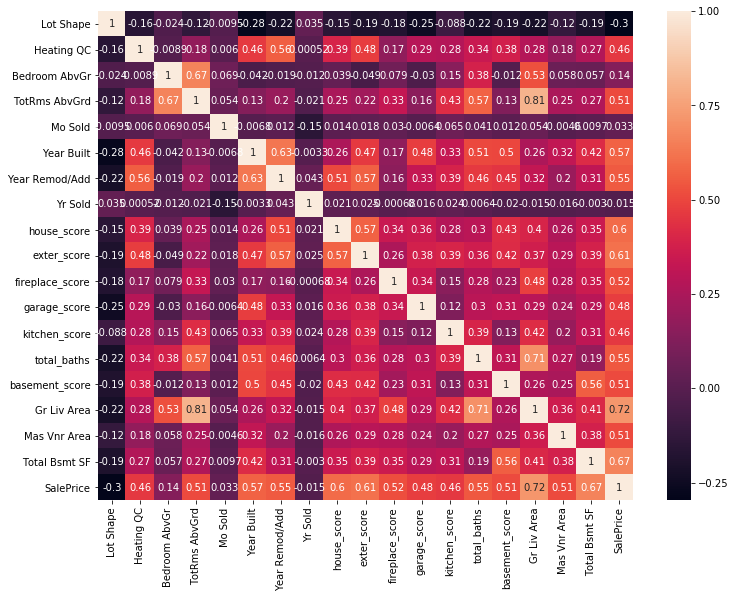

In [66]:
plt.figure(figsize=(12, 9))

sns.heatmap(df1[feature_new].corr(), annot = True) 

In [67]:
df1[feature_new].to_csv('featurenew.csv')


# <span style="color: green">   LINEAR, LASSO AND RIDGE REGRESSION MODELS </span>

## <span style="color: green"> TRAIN TEST SPLIT   </span>

In [68]:
df2 = pd.read_csv('featurenew.csv')
df2.head(2)

Unnamed: 0  Lot Shape Land Contour House Style  Heating QC Central Air  \
0           0          3          Lvl      2Story           5           Y   
1           1          3          Lvl      2Story           5           Y   

   Bedroom AbvGr  TotRms AbvGrd  Mo Sold  Year Built  ...  exter_score  \
0              3              6        3        1976  ...            7   
1              4              8        4        1996  ...            7   

  fireplace_score  garage_score  kitchen_score  total_baths  basement_score  \
0               0           NaN              4            3               6   
1               3           NaN              4            3               7   

   Gr Liv Area  Mas Vnr Area  Total Bsmt SF  SalePrice  
0         1479         289.0          725.0     130500  
1         2122         132.0          913.0     220000  

[2 rows x 24 columns]

In [114]:
df2.columns

Index(['Unnamed: 0', 'Lot Shape', 'Land Contour', 'House Style', 'Heating QC',
       'Central Air', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Mo Sold',
       'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Yr Sold',
       'house_score', 'exter_score', 'fireplace_score', 'garage_score',
       'kitchen_score', 'total_baths', 'basement_score', 'Gr Liv Area',
       'Mas Vnr Area', 'Total Bsmt SF', 'SalePrice'],
      dtype='object')

In [115]:
df2.columns
df2.isnull().sum()

Unnamed: 0           0
Lot Shape            0
Land Contour         0
House Style          0
Heating QC           0
Central Air          0
Bedroom AbvGr        0
TotRms AbvGrd        0
Mo Sold              0
Year Built           0
Year Remod/Add       0
Garage Yr Blt        0
Yr Sold              0
house_score          0
exter_score          0
fireplace_score      0
garage_score       579
kitchen_score        0
total_baths          0
basement_score       0
Gr Liv Area          0
Mas Vnr Area         0
Total Bsmt SF        0
SalePrice            0
dtype: int64

In [116]:

y = df2['SalePrice']
features = [col for col in df2.columns if col != 'SalePrice']
X = df2[features] 

In [117]:
X.columns

Index(['Unnamed: 0', 'Lot Shape', 'Land Contour', 'House Style', 'Heating QC',
       'Central Air', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Mo Sold',
       'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Yr Sold',
       'house_score', 'exter_score', 'fireplace_score', 'garage_score',
       'kitchen_score', 'total_baths', 'basement_score', 'Gr Liv Area',
       'Mas Vnr Area', 'Total Bsmt SF'],
      dtype='object')

In [118]:
X.isnull().sum().sort_values(ascending=False).head()

garage_score      579
Total Bsmt SF       0
Year Remod/Add      0
Lot Shape           0
Land Contour        0
dtype: int64

# <span style="color: green">  TRAIN TEST SPLIT AND CHECKING OF X- TRAIN AND X-TEST SHAPE</span>

In [119]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [120]:
X_train.columns

Index(['Unnamed: 0', 'Lot Shape', 'Land Contour', 'House Style', 'Heating QC',
       'Central Air', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Mo Sold',
       'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Yr Sold',
       'house_score', 'exter_score', 'fireplace_score', 'garage_score',
       'kitchen_score', 'total_baths', 'basement_score', 'Gr Liv Area',
       'Mas Vnr Area', 'Total Bsmt SF'],
      dtype='object')

In [121]:
new = df2.drop(columns=['Unnamed: 0','Central Air', 'Total Bsmt SF', 'Lot Shape', 'Land Contour','garage_score','House Style','Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Yr Sold','Mas Vnr Area', 'Lot Shape'], axis =1)
new.head()

Heating QC  Bedroom AbvGr  TotRms AbvGrd  Mo Sold  house_score  \
0           5              3              6        3           14   
1           5              4              8        4           12   
2           3              3              5        1           12   
3           4              3              7        4           10   
4           3              3              6        3           14   

   exter_score  fireplace_score  kitchen_score  total_baths  basement_score  \
0            7                0              4            3               6   
1            7                3              4            3               7   
2            7                0              4            1               6   
3            6                0              3            3               7   
4            6                0              3            2               6   

   Gr Liv Area  SalePrice  
0         1479     130500  
1         2122     220000  
2         1057     109000  
3         1444     174000  
4         1445     138500

In [122]:
new.columns

Index(['Heating QC', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Mo Sold',
       'house_score', 'exter_score', 'fireplace_score', 'kitchen_score',
       'total_baths', 'basement_score', 'Gr Liv Area', 'SalePrice'],
      dtype='object')

In [123]:
df2[new.columns].dtypes


Heating QC         int64
Bedroom AbvGr      int64
TotRms AbvGrd      int64
Mo Sold            int64
house_score        int64
exter_score        int64
fireplace_score    int64
kitchen_score      int64
total_baths        int64
basement_score     int64
Gr Liv Area        int64
SalePrice          int64
dtype: object

In [124]:
y = df2['SalePrice']
features = [col for col in df2[new.columns] if col != 'SalePrice']
X = df2[features]


In [125]:
X.columns

Index(['Heating QC', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Mo Sold',
       'house_score', 'exter_score', 'fireplace_score', 'kitchen_score',
       'total_baths', 'basement_score', 'Gr Liv Area'],
      dtype='object')

## <span style="color: green">  TEST DATA PREPROCESSING  </span>

In [126]:
test_model = pd.read_csv("test.csv")
test_model.head(2)

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   

  Alley Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area Pool QC  \
0  Grvl       Reg          Lvl  ...          0            0         0     NaN   
1   NaN       IR1          Lvl  ...          0            0         0     NaN   

  Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  
0   NaN          NaN        0       4     2006        WD   
1   NaN          NaN        0       8     2006        WD   

[2 rows x 80 columns]

In [127]:
test_model['outdoor_SF'] = test_model['Wood Deck SF'] + test_model['Open Porch SF'] + test_model['Screen Porch']

In [128]:
test_model= test_model.drop(['Screen Porch','Wood Deck SF','Open Porch SF'],axis=1)

In [129]:
quality_codes = {
    'Ex' : 5,
    'Gd' : 4,
    'TA' : 3,
    'Fa' : 2,
    'Po' : 1,
    'NA' : 0,
    'missing' :0,
    np.nan : 0
}

In [130]:
test_cat_quality_features = ['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Heating QC','Kitchen Qual','Fireplace Qu',
                           'Garage Qual', 'Garage Cond','Pool QC']

In [131]:
for feature in test_cat_quality_features:
    test_model[feature] = test_model[feature].map(quality_codes)

In [132]:
test_model['Bsmt Exposure'] = test_model['Bsmt Exposure'].map({'Gd':5,'Av':4,'Mn':3,'No':2,'NA':1,'missing':0})


In [133]:
test_model['Garage Finish'] = test_model['Garage Finish'].map({'Fin':3,'Rfn':2,'Unf':1,'NA':0,'missing':0})


In [134]:
test_model['Lot Shape'] = test_model['Lot Shape'].map({'Reg':4,'IR1':3,'IR2':2,'IR3':1,'missing':0})


In [135]:
test_model['house_score'] = test_model['Overall Qual'] + test_model['Overall Cond']
test_model['exter_score'] = test_model['Exter Qual'] + test_model['Exter Cond']
test_model['fireplace_score'] = test_model['Fireplace Qu'] * test_model['Fireplaces']
test_model['garage_score'] =  test_model['Garage Qual'] + test_model['Garage Cond'] + test_model['Garage Finish'] 
test_model['kitchen_score'] = test_model['Kitchen AbvGr'] * test_model['Kitchen Qual']
test_model['total_baths'] = test_model['Full Bath'] + test_model['Half Bath']
test_model['basement_score'] =   test_model['Bsmt Cond'] + test_model['Bsmt Qual']

In [136]:
test_aggregated_columns = ["house_score","exter_score","fireplace_score","garage_score","kitchen_score",
                     "total_baths","basement_score"]

In [137]:
columns_to_drop = ["MS SubClass","MS Zoning","Street","Alley","Land Countour",
                  "Overall Qual","Overall Cond","Full Bath","Half Bath",
                   "Utilities","Land Slope","Condition 1",
                  "Condition 2","Bldg Type","Roof Matl",
                  "Roof Style","Exter Qual","Exter Cond",'Mas Vnr Type','Bsmt Cond',
                  "Bsmt Exposure","BsmtFin Type 1","Bsmt Qual","BsmtFin Type 2","Heating",
                  "Electrical","Bsmt Half Bath","Kitchen AbvGr","Kitchen Qual",
                  "Functional","Fireplace Qu","Fireplaces","Garage Qual","Garage Cond","Garage Finish","Garage Cars",
                  "Paved Drive","Pool QC","Fence","Misc Feature","Sale Type","Neighborhood","Foundation",
                  "Exterior 1st" , "Exterior 2nd","Bsmt Full Bath", "Garage Type" , "Lot Config"]

In [138]:
test_feature_new = [col for col in test_cat_quality_features if col not in columns_to_drop]


In [139]:
test_feature_new.extend(test_aggregated_columns)


In [140]:
test_model[test_feature_new].to_csv('/Users/shaminimagandran/Desktop/testfeaturenew.csv')


## <span style="color: Magenta">   DEFINING X AND Y VARIABLES  </span>

In [141]:
y = df2['SalePrice']
features = [col for col in df2[features] if col != 'SalePrice']
X = df2[features]


## <span style="color: Magenta">   The dataset was fairly messy with regard to the number of missing values and the way levels of categorical variables were organized and coded. In order to tackle the large amount of cleaning required, we thought it was best to split the data </span>

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 43)

In [143]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [144]:
ss = StandardScaler()
X_test_scaled = ss.fit_transform(X_test)


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## <span style="color: MediumTurquoise">   LINEAR MODEL, FIT AND PREDICT </span>

In [156]:
test_model = pd.read_csv("test.csv")
test_model.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area Pool QC  \
0  Grvl       Reg          Lvl  ...          0            0         0     NaN   
1   NaN       IR1          Lvl  ...          0            0         0     NaN   
2   NaN       IR1          Lvl  ...          0            0         0     NaN   
3   NaN       Reg          Lvl  ...          0            0         0     NaN   
4   NaN       IR1          Lvl  ...          0          185         0     NaN   

  Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  
0   NaN          NaN        0       4     2006        WD   
1   NaN          NaN        0       8     2006        WD   
2   NaN          NaN        0       9     2006        New  
3   NaN          NaN        0       7     2007        WD   
4   NaN          NaN        0       7     2009        WD   

[5 rows x 80 columns]


## <span style="color: Magenta"> Calculating R2 score </span>

###  This shows that despite the high number of predictors variables in the model  we have not been penalized heavily since most variables account for a significant amount of variance in sale price. We can further simplify and improve this model by dropping highly correlated variables and insignificant predictors.

In [ ]:
test_model.shape

In [ ]:
lr_submission = LinearRegression().fit(X_train_scaled,y_train)


In [ ]:
lr = LinearRegression()
model = lr.fit(X_train,y_train)
print(model.score(X_train,y_train))
cross_val_score(LinearRegression(), X_train, y_train,cv=4)


In [146]:
print(model.score(X_test,y_test))
y_predict = model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_predict))


0.782292342385543


34639.95325560779

# <span style="color: Tomato">  Cross Validation and kfold </span>

In [147]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_score(lr, X_train_scaled, y_train, cv=kf).mean()


0.7462132985949008

# <span style="color: RoyalBlue"> Ridge </span>

In [148]:
ridge_model = Ridge()

In [149]:
ridge_model = ridge_model.fit(X_train,y_train)

In [150]:
y_predict_ridge = ridge_model.predict(X_test) 

In [151]:
np.sqrt(mean_squared_error(y_test,y_predict_ridge))

34638.58228747372

 # <span style="color: DarkMagenta">  Lasso Model </span>

In [152]:
lasso = Lasso()

In [153]:
lasso_model = lasso.fit(X_train,y_train)


In [154]:
y_predict_lasso = lasso_model.predict(X_test)


In [155]:
np.sqrt(mean_squared_error(y_test,y_predict_lasso))


34639.870524136284

# <span style="color: blue"> Conclusion and Recommendations</span>


### RMSE results are better both on training and test sets.There are some Neighborhood categories that are interesting.House prices change a whole lot from one neighborhood to another in the same city.

### Putting time and effort into preparing the dataset and optimizing the  models resulted in a decent score. However, it is more important to have a more comprehensive features that includes more features on the house keeping in mind the more important features that home buyers are looking for. 

### The ridge model performed the best in giving the lowest error.

### My columns used in anlaysis: 'Heating QC', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Mo Sold','house_score', 'exter_score', 'fireplace_score', 'kitchen_score','total_baths', 'basement_score', 'Gr Liv Area'

### This is a combination of some of the features of the house. The score can be improved however this is a more holistic view on all the aspects of the house.

### The biggest takeaways for me were that square footage, quality / condition, quality of materials, neighborhood, and number of bathrooms are very important factors for sale prices from correlation and heatmaps and value counts. However, other attributes should be considered for home owners looking to sell and home buyers looking to buy


# <span style="color: blue"> Limitations </span>

### I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these 5 unusual observations) before assigning it to students.
### There were many missing and nan values.If we have numeric data with a normal distribution, dealing with nulls can be relatively simple; we can impute mean or median values for the nulls. However, for this dataset, there are surprisingly few nulls in the numeric data. 
### There are also categorical data hence null values have to be addressed as well.
